In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [2]:
#Read the dataset
data = pd.read_excel(r"C:\Users\nhuma\OneDrive\Desktop\Data\Sample test.xlsx")
data.head()

,Customer ID,Last time you used the service,Money Spent,Efficiency,Friendliness,Value,reliability,Overall Satisfaction,Verbatim
0,6686,31-90 days,>1000,5,4,4,4,10,"""This service has transformed my experience. I..."
1,2632,more than 3 months,500-1000,5,4,4,5,10,"""I'm obsessed with their exceptional service. ..."
2,2226,more than 3 months,500-1000,0,1,0,0,2,"""Their service was a waste of money. I receive..."
3,4717,more than a year,>1000,4,4,4,4,9,"""I can't thank them enough for their help. The..."
4,3702,within 30 days,500-1000,3,3,3,3,7,"""They've earned my loyalty for life."""


# This section will analyse the relationship and difference between time used service, money spent and overall satisfaction of customer


In [3]:
#Drop columns
df = data.filter(['Last time you used the service', 'Money Spent', 'Overall Satisfaction'])
df.head()

,Last time you used the service,Money Spent,Overall Satisfaction
0,31-90 days,>1000,10
1,more than 3 months,500-1000,10
2,more than 3 months,500-1000,2
3,more than a year,>1000,9
4,within 30 days,500-1000,7


In [4]:
df.shape

(152, 3)

In [5]:
df['Overall Satisfaction'].value_counts()

9     29
10    28
8     26
7     19
2      9
6      9
5      8
0      8
3      6
1      6
4      4
Name: Overall Satisfaction, dtype: int64

In [6]:
df['Overall Satisfaction'].value_counts(normalize=True)

9     0.190789
10    0.184211
8     0.171053
7     0.125000
2     0.059211
6     0.059211
5     0.052632
0     0.052632
3     0.039474
1     0.039474
4     0.026316
Name: Overall Satisfaction, dtype: float64

In [7]:
#rename column in the new dataset
df1 = df.rename(columns={'Last time you used the service':'Time used service'})
df1

,Time used service,Money Spent,Overall Satisfaction
0,31-90 days,>1000,10
1,more than 3 months,500-1000,10
2,more than 3 months,500-1000,2
3,more than a year,>1000,9
4,within 30 days,500-1000,7
...,...,...,...
147,31-90 days,100-500,8
148,within 30 days,1-100,7
149,more than 3 months,500-1000,7
150,more than a year,500-1000,10


In [8]:
# Check empty value in dataset
df1 = df1.replace('', np.nan)             # remove empty values
nan_values = df1[df1.isna().any(axis=1)]  # to get all rows with Na

In [9]:
#Check the count overall rating
df1['Overall Satisfaction'].describe()

count    152.000000
mean       6.802632
std        3.038472
min        0.000000
25%        5.000000
50%        8.000000
75%        9.000000
max       10.000000
Name: Overall Satisfaction, dtype: float64

<Axes: >

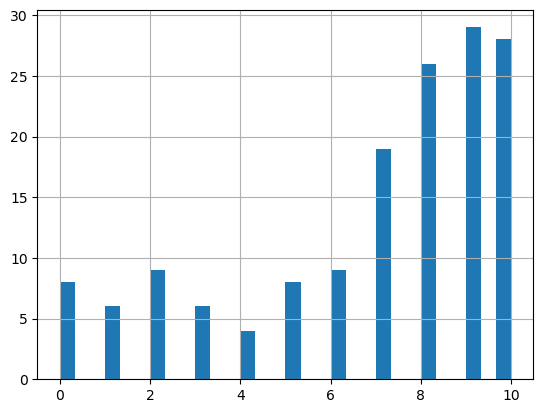

In [10]:
#Display the historgram bin to see the gap between median and mean.
df1['Overall Satisfaction'].hist(bins=30)

The histogram shows that most of the satisfaction from 8 to 10 where 9 made the highest percentage. The graph has trend through left skewer, with 25% of rating is 5. 

In [11]:
# Feedback Scores
graph = px.histogram(df1, x="Overall Satisfaction")
graph.update_traces(marker_color="violet",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1)
graph.update_layout(title_text='Feedback Score')
graph.show()

This graph show the count of overall rating from 0 to 10 and show the number of count for each point.

# In this part will sort how many type of time used service and range of money spent of customer

In [12]:
#Distinct the value from time used service
print(sorted(df1['Time used service'].unique()))

['31-90 days', 'more than 3 months', 'more than a year', 'within 30 days']


In [13]:
#Distinct the value from money spent
print(sorted(df1['Money Spent'].unique()))

['1-100', '100-500', '500-1000', '>1000']


## Create the four plot flowing by four range of time to see the change of rating from customer 

### Time used service within 30 days

In [14]:
#User with time used service within 30 days
sdf1 =  df1[df1['Time used service'] == 'within 30 days']
sdf1['Overall Satisfaction'].median()

8.0

<Axes: xlabel='Overall Satisfaction', ylabel='Count'>

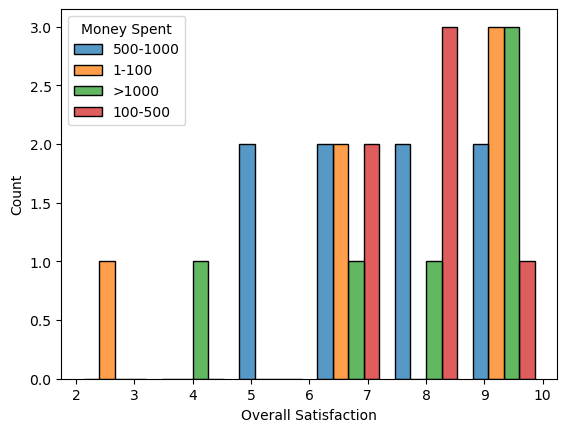

In [15]:
sns.histplot(data=sdf1,x="Overall Satisfaction", hue="Money Spent",multiple="dodge", shrink=.8)

As we can see from the chart, the lowest point is around 2 to 3, next to that is 4-5 point, which round up to 5 counts. While at this time used service, most of rating up to 6, with money spending 100-500, 500-1000 and > 1000 made a higher percentage. There is a few rating at 4 while they spent more than 1000

### Time used service from 31-90 days

In [16]:
#User with time used service 31-90 days
mdf1 =  df1[df1['Time used service'] == '31-90 days']
mdf1['Overall Satisfaction'].median()

7.0

<Axes: xlabel='Overall Satisfaction', ylabel='Count'>

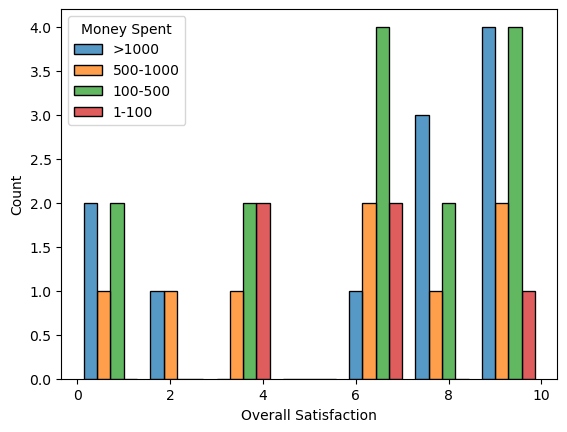

In [17]:
sns.histplot(data=mdf1,x="Overall Satisfaction", hue="Money Spent",multiple="dodge", shrink=.8)

In this chart, base on the total counts, there many people at this stage compared to the last one. At this stage, the mone spent more than 1000 and 100 - 500 appeared in both lowest and highest rating. The green bar represents for money spent 100-500 made up the largest number.

### Time used service more than 3 months

In [18]:
#User with time used service more than 3 months
tdf1 =  df1[df1['Time used service'] == 'more than 3 months']
tdf1['Overall Satisfaction'].median()

8.0

<Axes: xlabel='Overall Satisfaction', ylabel='Count'>

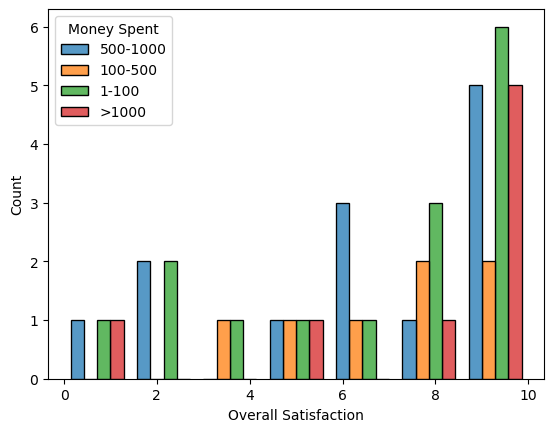

In [19]:
sns.histplot(data=tdf1,x="Overall Satisfaction", hue="Money Spent",multiple="dodge", shrink=.8)

Through the bar, we can see it less rating more than the two previous time range, which means less customer at this stage. The rating is diversity at this stage from 0 to 10. 

### Time used service more than a year

In [20]:
#User with time used service more than a year
ydf1 =  df1[df1['Time used service'] == 'more than a year']
ydf1['Overall Satisfaction'].median()

8.0

<Axes: xlabel='Overall Satisfaction', ylabel='Count'>

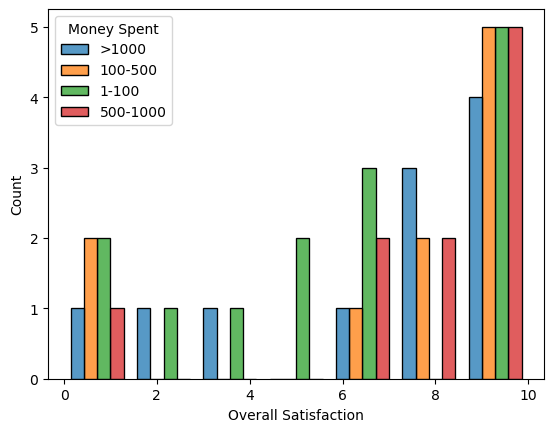

In [21]:
sns.histplot(data=ydf1,x="Overall Satisfaction", hue="Money Spent",multiple="dodge", shrink=.8)

While we can see less rating at range time more than 3 months, however coming to more than a year range, there is more counts from customer. There is an equal counting at 4 range of money spent at 9-10 point. Seeing the minor larger spending at minor rating. 

In [22]:
#Drop columns
setdata = data.filter(['Efficiency', 'Friendliness', 'Value','reliability','Overall Satisfaction' ])
setdata.head()

,Efficiency,Friendliness,Value,reliability,Overall Satisfaction
0,5,4,4,4,10
1,5,4,4,5,10
2,0,1,0,0,2
3,4,4,4,4,9
4,3,3,3,3,7


In [23]:
setdata['Efficiency'].value_counts(normalize=True)

4    0.348684
3    0.250000
0    0.118421
5    0.105263
1    0.092105
2    0.085526
Name: Efficiency, dtype: float64

In [24]:
eff = px.histogram(setdata, x="Efficiency")
eff.update_traces(marker_color="yellow",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1)
eff.update_layout(title_text='Efficiency Score')
eff.show()

In [25]:
setdata['Friendliness'].value_counts(normalize=True)

4    0.342105
3    0.256579
0    0.111842
5    0.111842
2    0.098684
1    0.078947
Name: Friendliness, dtype: float64

In [26]:
fri = px.histogram(setdata, x="Friendliness")
fri.update_traces(marker_color="yellow",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1)
fri.update_layout(title_text='Efficiency Score')
fri.show()

In [27]:
setdata['Value'].value_counts(normalize=True)

4    0.342105
3    0.263158
0    0.131579
5    0.105263
2    0.085526
1    0.072368
Name: Value, dtype: float64

In [28]:
val = px.histogram(setdata, x="Value")
val.update_traces(marker_color="yellow",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1)
val.update_layout(title_text='Efficiency Score')
val.show()

In [29]:
setdata['reliability'].value_counts(normalize=True)

4    0.355263
3    0.223684
0    0.111842
2    0.111842
5    0.105263
1    0.092105
Name: reliability, dtype: float64

In [30]:
rel = px.histogram(setdata, x="reliability")
rel.update_traces(marker_color="yellow",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1)
rel.update_layout(title_text='Efficiency Score')
rel.show()